In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load all three csvs into dataframes
users = pd.read_csv("USER_TAKEHOME.csv")
products=pd.read_csv("PRODUCTS_TAKEHOME.csv")
transactions=pd.read_csv("TRANSACTION_TAKEHOME.csv")

In [3]:
#lets explore all three tables one by one
users.head()

,ID,CREATED_DATE,BIRTH_DATE,STATE,LANGUAGE,GENDER
0,5ef3b4f17053ab141787697d,2020-06-24 20:17:54.000 Z,2000-08-11 00:00:00.000 Z,CA,es-419,female
1,5ff220d383fcfc12622b96bc,2021-01-03 19:53:55.000 Z,2001-09-24 04:00:00.000 Z,PA,en,female
2,6477950aa55bb77a0e27ee10,2023-05-31 18:42:18.000 Z,1994-10-28 00:00:00.000 Z,FL,es-419,female
3,658a306e99b40f103b63ccf8,2023-12-26 01:46:22.000 Z,NaN,NC,en,NaN
4,653cf5d6a225ea102b7ecdc2,2023-10-28 11:51:50.000 Z,1972-03-19 00:00:00.000 Z,PA,en,female


In [4]:
#Renaming the id column to avoid confusion while joining to other tables 
users.rename(columns={'ID': 'USER_ID'}, inplace=True)

In [5]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
USER_ID         100000 non-null object
CREATED_DATE    100000 non-null object
BIRTH_DATE      96325 non-null object
STATE           95188 non-null object
LANGUAGE        69492 non-null object
GENDER          94108 non-null object
dtypes: object(6)
memory usage: 4.6+ MB


In [6]:
# replace blanks in the date column by some default 
users['BIRTH_DATE'] = users['BIRTH_DATE'].fillna(pd.to_datetime('1900-01-01'))
users['CREATED_DATE'] = users['CREATED_DATE'].fillna(pd.to_datetime('2026-01-01'))

# convert the date columns to datetime64

users['CREATED_DATE'] = pd.to_datetime(users['CREATED_DATE'])
users['BIRTH_DATE'] = pd.to_datetime(users['BIRTH_DATE'], errors='coerce')

# check the details of the table
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
USER_ID         100000 non-null object
CREATED_DATE    100000 non-null datetime64[ns]
BIRTH_DATE      100000 non-null datetime64[ns]
STATE           95188 non-null object
LANGUAGE        69492 non-null object
GENDER          94108 non-null object
dtypes: datetime64[ns](2), object(4)
memory usage: 4.6+ MB


In [7]:
users.describe(include='all')

,USER_ID,CREATED_DATE,BIRTH_DATE,STATE,LANGUAGE,GENDER
count,100000,100000,100000,95188,69492,94108
unique,100000,99942,54721,52,2,11
top,6498f359e59a088dc6dfcc8e,2022-06-30 22:36:23,1900-01-01 00:00:00,TX,en,female
freq,1,2,3677,9028,63403,64240
first,NaN,2014-04-18 23:14:55,1900-01-01 00:00:00,NaN,NaN,NaN
last,NaN,2024-09-11 17:59:15,2022-04-03 07:00:00,NaN,NaN,NaN


In [8]:
#check number of missing values
users.isnull().sum()

USER_ID             0
CREATED_DATE        0
BIRTH_DATE          0
STATE            4812
LANGUAGE        30508
GENDER           5892
dtype: int64

In [9]:
users.shape

(100000, 6)

In [10]:
users=users.drop_duplicates()

In [11]:
users.shape

(100000, 6)

The above statistics indicate that the users table has a lot of missing values. The treatment for each of the values will depend on the relevance of the individual columns.

In [12]:
users['LANGUAGE'].value_counts()

en        63403
es-419     6089
Name: LANGUAGE, dtype: int64

In [13]:
users['GENDER'].value_counts()

female                    64240
male                      25829
transgender                1772
prefer_not_to_say          1350
non_binary                  473
unknown                     196
not_listed                  180
Non-Binary                   34
not_specified                28
My gender isn't listed        5
Prefer not to say             1
Name: GENDER, dtype: int64

In [14]:
#consolidating gender categories
users['GENDER'] = users['GENDER'].replace({'prefer_not_to_say': 'Prefer not to say', 'not_listed': 'Non-Binary', 'not_specified': 'Prefer not to say', 'unknown': 'Prefer not to say', 'non_binary': 'Non-Binary',"My gender isn't listed": 'Non-Binary'})

In [15]:
# handling missing values

# the language column has only two cateogries and more than 90% entries are for english so let's replace
users['LANGUAGE'] = users['LANGUAGE'].fillna('en')

# since the gender column must have been an optional column if left blank let's replace it with 'Prefer not to say'
users['GENDER'] = users['GENDER'].fillna('Prefer not to say')

# replace blanks in the state column by 'unknown'
users['STATE'] = users['STATE'].fillna('unknown')

# check for issues with birth dates
users[users['BIRTH_DATE'] >= users['CREATED_DATE']]

#only one entry where dob was later than create date 
users.loc[users['USER_ID'] == '5f31fc048fa1e914d38d6952', 'BIRTH_DATE'] = pd.to_datetime('1900-01-01')

In [16]:
products.head(20)

,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,MANUFACTURER,BRAND,BARCODE
0,Health & Wellness,Sexual Health,Conductivity Gels & Lotions,NaN,NaN,NaN,7.964944e+11
1,Snacks,Puffed Snacks,Cheese Curls & Puffs,NaN,NaN,NaN,2.327801e+10
2,Health & Wellness,Hair Care,Hair Care Accessories,NaN,PLACEHOLDER MANUFACTURER,ELECSOP,4.618178e+11
3,Health & Wellness,Oral Care,Toothpaste,NaN,COLGATE-PALMOLIVE,COLGATE,3.500047e+10
4,Health & Wellness,Medicines & Treatments,Essential Oils,NaN,MAPLE HOLISTICS AND HONEYDEW PRODUCTS INTERCHA...,MAPLE HOLISTICS,8.068109e+11
5,Health & Wellness,Hair Care,Hair Care Accessories,NaN,PLACEHOLDER MANUFACTURER,BEAUHAIR,6.626585e+11
6,Health & Wellness,Medicines & Treatments,Vitamins & Herbal Supplements,NaN,HALEON,EMERGEN-C,6.177376e+11
7,Health & Wellness,Deodorant & Antiperspirant,Men's Deodorant & Antiperspirant,NaN,NaN,NaN,7.501839e+12
8,Snacks,Snack Bars,Granola Bars,NaN,HYVEE INC,HY-VEE,7.545013e+10
9,Health & Wellness,NaN,NaN,NaN,CHURCH & DWIGHT,REPHRESH,NaN


In [17]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 845552 entries, 0 to 845551
Data columns (total 7 columns):
CATEGORY_1      845441 non-null object
CATEGORY_2      844128 non-null object
CATEGORY_3      784986 non-null object
CATEGORY_4      67459 non-null object
MANUFACTURER    619078 non-null object
BRAND           619080 non-null object
BARCODE         841527 non-null float64
dtypes: float64(1), object(6)
memory usage: 45.2+ MB


In [18]:
products.describe(include='all')

,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,MANUFACTURER,BRAND,BARCODE
count,845441,844128,784986,67459,619078,619080,8.415270e+05
unique,27,121,344,127,4354,8122,NaN
top,Health & Wellness,Candy,Confection Candy,Lip Balms,PLACEHOLDER MANUFACTURER,REM BRAND,NaN
freq,512695,121036,56965,9737,86902,20813,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,6.016109e+11
std,NaN,NaN,NaN,NaN,NaN,NaN,1.022530e+12
min,NaN,NaN,NaN,NaN,NaN,NaN,1.850000e+02
25%,NaN,NaN,NaN,NaN,NaN,NaN,7.124923e+10
50%,NaN,NaN,NaN,NaN,NaN,NaN,6.344185e+11
75%,NaN,NaN,NaN,NaN,NaN,NaN,7.683955e+11


In [19]:
#check number of missing values
products.isnull().sum()

CATEGORY_1         111
CATEGORY_2        1424
CATEGORY_3       60566
CATEGORY_4      778093
MANUFACTURER    226474
BRAND           226472
BARCODE           4025
dtype: int64

In [20]:
# There are a few entries where the barcode is null.
# These entries will not add any value to our analysis as we can't match them to the transactions table
products.dropna(subset=['BARCODE'], inplace=True)

In [21]:
# the products table is full of categorical values mainly product details
products['MANUFACTURER'] = products['MANUFACTURER'].fillna('Unknown') #fill nan manufacturers.
products['BRAND'] = products['BRAND'].fillna('Unknown') #fill nan brands
products['CATEGORY_1'] = products['CATEGORY_1'].fillna('Unknown') #fill nan category_1
products['CATEGORY_2'] = products['CATEGORY_2'].fillna('Unknown') #fill nan category
products['CATEGORY_3'] = products['CATEGORY_3'].fillna('Unknown') #fill nan category_3
products['CATEGORY_4'] = products['CATEGORY_4'].fillna('Unknown') #fill nan category_4

In [22]:
# 4K rows have missing barcodes

In [23]:
products.shape

(841527, 7)

In [24]:
products=products.drop_duplicates()

In [25]:
products.shape

(841369, 7)

In [26]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
RECEIPT_ID        50000 non-null object
PURCHASE_DATE     50000 non-null object
SCAN_DATE         50000 non-null object
STORE_NAME        50000 non-null object
USER_ID           50000 non-null object
BARCODE           44238 non-null float64
FINAL_QUANTITY    50000 non-null object
FINAL_SALE        50000 non-null object
dtypes: float64(1), object(7)
memory usage: 3.1+ MB


In [27]:
transactions.head()
transactions.describe(include='all')

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
count,50000,50000,50000,50000,50000,4.423800e+04,50000,50000
unique,24440,89,24440,954,17694,NaN,87,1435
top,bedac253-2256-461b-96af-267748e6cecf,2024-06-15,2024-09-08 20:00:42.348 Z,WALMART,64e62de5ca929250373e6cf5,NaN,1.00,
freq,12,774,12,21326,22,NaN,35698,12500
mean,NaN,NaN,NaN,NaN,NaN,1.715863e+11,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,3.269219e+11,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,-1.000000e+00,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,3.077212e+10,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,5.210004e+10,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,8.536765e+10,NaN,NaN


## It is not clear what is the metric for FINAL_SALE and FINAL_QUANTITY columns. So we are assuming that it means final sale amount and final sale quantity.

### How can the final quantity be zero when the final sale value is non zero? 
if quantity is zero then probably those items were never purchased but they were just scanned or it is just a discount code that is not purchased on its own.
### We also have a few entries where sales value is zero but final quantiy is non zero
if sales value is zero then the items were probably scanned but not purchased

In [28]:
# convert date columns to datetime type

transactions['PURCHASE_DATE'] = pd.to_datetime(transactions['PURCHASE_DATE'])
transactions['SCAN_DATE'] = pd.to_datetime(transactions['SCAN_DATE'])
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
RECEIPT_ID        50000 non-null object
PURCHASE_DATE     50000 non-null datetime64[ns]
SCAN_DATE         50000 non-null datetime64[ns]
STORE_NAME        50000 non-null object
USER_ID           50000 non-null object
BARCODE           44238 non-null float64
FINAL_QUANTITY    50000 non-null object
FINAL_SALE        50000 non-null object
dtypes: datetime64[ns](2), float64(1), object(5)
memory usage: 3.1+ MB


In [29]:
# We have noticed that a lot of users have scanned their receipts with a delay of a few days.
# Trying to check if there is a pattern in those
transactions['SCANNING_LAG'] = transactions['SCAN_DATE'] - transactions['PURCHASE_DATE']
transactions=transactions.sort_values(by='SCANNING_LAG', ascending=False)
transactions['SCANNING_LAG']=transactions['SCANNING_LAG'].dt.days
transactions.head()

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE,SCANNING_LAG
15743,a08f3646-746b-4dc9-ad85-90bfb0630ad8,2024-06-17,2024-07-19 18:39:35.302,WALMART,66782a8a86cc41b000ccc0a1,7.874220e+10,zero,3.16,32
43673,a08f3646-746b-4dc9-ad85-90bfb0630ad8,2024-06-17,2024-07-19 18:39:35.302,WALMART,66782a8a86cc41b000ccc0a1,7.874220e+10,1.00,3.16,32
4825,31aaf10c-7616-4217-93c4-8b48f60f5ff1,2024-07-01,2024-08-01 16:37:36.473,WALMART,62a10c90d9666655703546bb,7.110001e+10,zero,4.74,31
46703,31aaf10c-7616-4217-93c4-8b48f60f5ff1,2024-07-01,2024-08-01 16:37:36.473,WALMART,62a10c90d9666655703546bb,7.110001e+10,1.00,4.74,31
39031,0ebb6030-583c-47ed-8ff4-3ced3ebfc715,2024-07-31,2024-08-30 10:45:56.234,WALMART,5f824e993cf790163fb764a6,6.811311e+11,1.00,5.98,30


### Some entries in the FINAL_QUANTITY column are non numeric (zero) convert those to numbers


In [30]:
transactions['FINAL_QUANTITY'] = transactions['FINAL_QUANTITY'].replace('zero',0) 

In [31]:
# convert final quantity and final sale to numeric data type
transactions['FINAL_QUANTITY'] = pd.to_numeric(transactions['FINAL_QUANTITY'])

# transactions['FINAL_SALE'] = pd.to_numeric(transactions['FINAL_SALE'])
# converting the rows with blank string to number for easier conversion to numeric data type

transactions['FINAL_SALE'] = transactions['FINAL_SALE'].replace(' ',0) 

transactions['FINAL_SALE'] = pd.to_numeric(transactions['FINAL_SALE'])

In [32]:
# check table statistics
#transactions.describe(include='all')

In [33]:
##### We can see that there are total 50K entries in the transactions table but there are only 24K receipt_ids.
# So lets try to check entries with same receipt_ids to verify if they are duplicates

transactions=transactions.sort_values(by='RECEIPT_ID')
transactions.head()

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE,SCANNING_LAG
0,0000d256-4041-4a3e-adc4-5623fb6e0c99,2024-08-21,2024-08-21 14:19:06.539,WALMART,63b73a7f3d310dceeabd4758,1.530001e+10,1.0,0.00,0
41567,0000d256-4041-4a3e-adc4-5623fb6e0c99,2024-08-21,2024-08-21 14:19:06.539,WALMART,63b73a7f3d310dceeabd4758,1.530001e+10,1.0,1.54,0
1,0001455d-7a92-4a7b-a1d2-c747af1c8fd3,2024-07-20,2024-07-20 09:50:24.206,ALDI,62c08877baa38d1a1f6c211a,NaN,0.0,1.49,0
39291,0001455d-7a92-4a7b-a1d2-c747af1c8fd3,2024-07-20,2024-07-20 09:50:24.206,ALDI,62c08877baa38d1a1f6c211a,NaN,1.0,1.49,0
25928,00017e0a-7851-42fb-bfab-0baa96e23586,2024-08-18,2024-08-19 15:38:56.813,WALMART,60842f207ac8b7729e472020,7.874223e+10,1.0,2.54,1


In [34]:
# let's check how many receipt_ids have multiple entries
transactions2 = transactions.groupby(['RECEIPT_ID','SCAN_DATE'])['FINAL_QUANTITY','FINAL_SALE'].count().reset_index()
transactions2.shape

(24440, 4)

We see that there are 24440 unique entries for reciept_id in the transactions table and receipt_ids with multiple entries is the exact same number, which means each receipt_id is appearing atleaset twice in the transactions table. We would have expected multiple entries for a single receipt ids because there could be more than one product scanned in the receipt, however we usee that the product details for the multiple transactions on a single receipt id are same in all regards except the final quantity and final sales column.

Also in case of multiple entries for a receipt_id it appears that only one of the entries has non zero value for both final quantity and final sales. 

In [35]:
## lets look at the receipt ids for columns where there are more than 2 entries

multiple_transacions=transactions2[transactions2['FINAL_QUANTITY'] >2]
multiple_transacions

,RECEIPT_ID,SCAN_DATE,FINAL_QUANTITY,FINAL_SALE
41,007d3232-3990-497f-a081-549e9e7a478b,2024-06-27 21:21:53.442,4,4
68,00bf741b-24d6-4064-a267-f87748bb5aa9,2024-07-09 17:37:14.702,4,4
149,019520fd-f28b-42ff-a29e-d6bf4f5c4b7c,2024-08-19 11:19:59.681,4,4
159,01a70fe0-026f-4bea-9da4-7d13bbf21e9a,2024-09-07 16:02:39.835,4,4
169,01d0e64c-0b62-405f-a7bf-2dc04c36a53d,2024-08-26 10:05:19.028,4,4
233,0273cbd8-1620-46c9-8e99-6971e850a2fc,2024-09-08 22:17:11.989,4,4
318,03705d69-d576-4fdf-a6d0-99a8bb5380be,2024-06-23 09:35:51.766,4,4
319,0373c1d8-3cc9-4cb2-a4f9-ddc7a974b671,2024-06-18 13:28:17.059,4,4
327,0386ab8c-8a01-4479-8ee7-eb82a72a4895,2024-08-03 15:51:47.012,4,4
361,03eb6f94-0088-47ae-a839-4dfa585d7044,2024-07-13 08:57:06.269,4,4


In [36]:
# Let's explore entries where receipt id is present more than 2 times to check for patterns
RECEIPT_ID=multiple_transacions['RECEIPT_ID'].tolist()
trans1=transactions[transactions['RECEIPT_ID'].isin(RECEIPT_ID)]
trans1.sort_values(by='RECEIPT_ID')

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE,SCANNING_LAG
41,007d3232-3990-497f-a081-549e9e7a478b,2024-06-25,2024-06-27 21:21:53.442,DOLLAR TREE STORES INC,63a8dbf101cb7c888c6ad87d,7.920006e+10,0.0,1.25,2
45553,007d3232-3990-497f-a081-549e9e7a478b,2024-06-25,2024-06-27 21:21:53.442,DOLLAR TREE STORES INC,63a8dbf101cb7c888c6ad87d,7.920006e+10,1.0,1.25,2
40498,007d3232-3990-497f-a081-549e9e7a478b,2024-06-25,2024-06-27 21:21:53.442,DOLLAR TREE STORES INC,63a8dbf101cb7c888c6ad87d,7.920006e+10,1.0,1.25,2
42,007d3232-3990-497f-a081-549e9e7a478b,2024-06-25,2024-06-27 21:21:53.442,DOLLAR TREE STORES INC,63a8dbf101cb7c888c6ad87d,7.920006e+10,1.0,0.00,2
69,00bf741b-24d6-4064-a267-f87748bb5aa9,2024-07-09,2024-07-09 17:37:14.702,ALDI,62676081ed0f8765fb700454,NaN,0.0,7.58,0
43639,00bf741b-24d6-4064-a267-f87748bb5aa9,2024-07-09,2024-07-09 17:37:14.702,ALDI,62676081ed0f8765fb700454,NaN,1.0,5.49,0
70,00bf741b-24d6-4064-a267-f87748bb5aa9,2024-07-09,2024-07-09 17:37:14.702,ALDI,62676081ed0f8765fb700454,NaN,1.0,0.00,0
28079,00bf741b-24d6-4064-a267-f87748bb5aa9,2024-07-09,2024-07-09 17:37:14.702,ALDI,62676081ed0f8765fb700454,NaN,2.0,7.58,0
151,019520fd-f28b-42ff-a29e-d6bf4f5c4b7c,2024-08-19,2024-08-19 11:19:59.681,MEIJER,646bdaa67a342372c857b958,4.125009e+10,0.0,2.49,0
41005,019520fd-f28b-42ff-a29e-d6bf4f5c4b7c,2024-08-19,2024-08-19 11:19:59.681,MEIJER,646bdaa67a342372c857b958,4.125022e+10,1.0,3.79,0


It appears that certain receipt ids eg '007d3232-3990-497f-a081-549e9e7a478b' have duplicate entries with quantity 1 and sales 1.25.


In [37]:
# removing duplicate entreis 
transactions.shape
transactions= transactions.drop_duplicates()

In [38]:
transactions.shape

(49665, 9)

Lets remove transactions that have 0 value in either FINAL_QUANTITY or FINAL_SALE

In [39]:
transactions=transactions[~((transactions['FINAL_QUANTITY'] == 0) | (transactions['FINAL_SALE'] == 0))]

In [40]:
transactions.isnull().sum()

RECEIPT_ID           0
PURCHASE_DATE        0
SCAN_DATE            0
STORE_NAME           0
USER_ID              0
BARCODE           2656
FINAL_QUANTITY       0
FINAL_SALE           0
SCANNING_LAG         0
dtype: int64

There are more than 2k entries with missing barcodes. Absence of barcode is possible for couple of reasons like the product is not present in the datsabse or was not scanned properly. It could also be for transactions that don't have a barcode example memberships.Let's dig deeper into these missing barcodes to see if there is any pattern.

### Dig deeper into barcode missing

In [41]:
missing_barcode=transactions[transactions['BARCODE'].isnull()]

In [42]:
missing_barcode=pd.merge(missing_barcode, users, on='USER_ID', how='left')

In [43]:
missing_barcode.info()
missing_barcode.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2656 entries, 0 to 2655
Data columns (total 14 columns):
RECEIPT_ID        2656 non-null object
PURCHASE_DATE     2656 non-null datetime64[ns]
SCAN_DATE         2656 non-null datetime64[ns]
STORE_NAME        2656 non-null object
USER_ID           2656 non-null object
BARCODE           0 non-null float64
FINAL_QUANTITY    2656 non-null float64
FINAL_SALE        2656 non-null float64
SCANNING_LAG      2656 non-null int64
CREATED_DATE      11 non-null datetime64[ns]
BIRTH_DATE        11 non-null datetime64[ns]
STATE             11 non-null object
LANGUAGE          11 non-null object
GENDER            11 non-null object
dtypes: datetime64[ns](4), float64(3), int64(1), object(6)
memory usage: 311.2+ KB


,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE,SCANNING_LAG,CREATED_DATE,BIRTH_DATE,STATE,LANGUAGE,GENDER
count,2656,2656,2656,2656,2656,0.0,2656.000000,2656.000000,2656.000000,11,11,11,11,11
unique,2619,89,2619,208,2414,NaN,NaN,NaN,NaN,11,11,10,1,2
top,f1808dd8-868b-4745-ad53-4178ef5fa1f8,2024-07-01 00:00:00,2024-07-25 10:07:45.377000,ALDI,64e62de5ca929250373e6cf5,NaN,NaN,NaN,NaN,2022-10-20 16:23:38,1989-03-13 05:00:00,FL,en,female
freq,3,75,3,1162,10,NaN,NaN,NaN,NaN,1,1,2,11,10
first,NaN,2024-06-12 00:00:00,2024-06-12 12:20:41.947000,NaN,NaN,NaN,NaN,NaN,NaN,2017-07-21 19:42:14,1954-07-12 00:00:00,NaN,NaN,NaN
last,NaN,2024-09-08 00:00:00,2024-09-08 22:11:14.505000,NaN,NaN,NaN,NaN,NaN,NaN,2023-09-23 22:30:34,1993-12-11 04:18:09,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,1.081081,5.256194,1.599398,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,0.495308,14.252679,2.641531,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,0.040000,0.010000,0.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.590000,0.000000,NaN,NaN,NaN,NaN,NaN


We have 2656 receipt ids but only 2619 are unique. Not taking any action because we are assuming that one receipt id might appear twice since the multiple entries have different sales and quantity values, probably due to a single receipt being updated using multiple snapshots/parts

In [44]:
# not filtering out rows with missing barcodes cause they might be useful for other parts of our analysis
#transactions.dropna(subset=['BARCODE'], inplace=True)

### Merge all three dataframes to get combineed data

In [45]:
# Merge transactions and products
merged_df = pd.merge(transactions, products, on='BARCODE', how='left')
# Merge with users
transactions['USER_ID'] = transactions['USER_ID'].str.strip()
users['USER_ID'] = users['USER_ID'].str.strip()
df = pd.merge(merged_df, users, on='USER_ID', how='left')


In [46]:
# Take a look at basic statistics about the data
#df.info()

df.describe(include='all')

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE,SCANNING_LAG,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,MANUFACTURER,BRAND,CREATED_DATE,BIRTH_DATE,STATE,LANGUAGE,GENDER
count,24540,24540,24540,24540,24540,2.188400e+04,24540.000000,24540.000000,24540.000000,12277,12277,12277,12277,12277,12277,130,130,130,130,130
unique,24132,89,24132,943,17518,NaN,NaN,NaN,NaN,11,51,193,53,470,1037,91,91,32,2,3
top,f1808dd8-868b-4745-ad53-4178ef5fa1f8,2024-06-15 00:00:00,2024-07-16 03:41:34.799000,WALMART,64e62de5ca929250373e6cf5,NaN,NaN,NaN,NaN,Snacks,Candy,Unknown,Unknown,PEPSICO,COCA-COLA,2023-05-22 21:12:06,1951-12-24 05:00:00,FL,en,female
freq,3,383,3,10587,11,NaN,NaN,NaN,NaN,7476,2041,1305,10797,1876,516,3,3,18,124,107
first,NaN,2024-06-12 00:00:00,2024-06-12 06:36:34.910000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-07-21 19:42:14,1900-01-01 00:00:00,NaN,NaN,NaN
last,NaN,2024-09-08 00:00:00,2024-09-08 23:07:19.836000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-07-01 13:42:31,1997-02-25 00:00:00,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,1.714058e+11,1.084821,4.639131,2.022901,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,3.278519e+11,1.811662,6.564927,3.387598,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,-1.000000e+00,0.010000,0.010000,-1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,3.077210e+10,1.000000,1.880000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Only 130 entries from the transaction table have user ids that match user_id from the users table. 
So there are 21K entries in transactions table for whom we don't have any user details. 

In [47]:
## Delay in scanning

#df['SCAN_DATE'] = df['SCAN_DATE'].dt.date

#df['SCAN_DATE']=df['SCAN_DATE'].dt.date
#df['PURCHASE_DATE']=df['PURCHASE_DATE'].dt.date

#df['SCAN_DATE'] = pd.to_datetime(df['SCAN_DATE'])

#df.inf()

## It seems that most of the users have scanned their receipts within 7 days of purchase.  

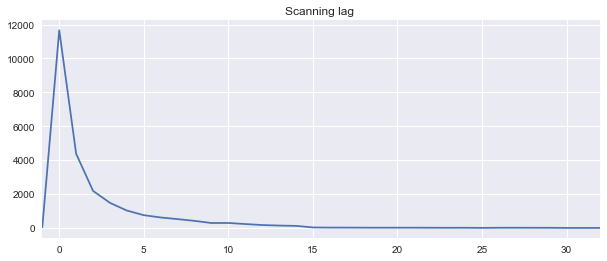

In [48]:
# transaction volume by Scanning lag
daily_transactions = df['SCANNING_LAG'].value_counts().sort_index()
daily_transactions.plot(figsize=(10, 4), title='Scanning lag ')
plt.show()

In [49]:
df['PURCHASE_DATE'] = pd.to_datetime(df['PURCHASE_DATE']).dt.date

# Calculate the age at the time of purchase
df['AGE_AT_PURCHASE'] = df['PURCHASE_DATE'].apply(lambda x: x.year) - df['BIRTH_DATE'].apply(lambda x: x.year) - ((df['PURCHASE_DATE'].apply(lambda x: (x.month, x.day)) < df['BIRTH_DATE'].apply(lambda x: (x.month, x.day))).astype(int))

# Check the age for rows where the user details are available 
df[~df['CREATED_DATE'].isnull()]

# We have set default DOB to be 1900-01-01 so checking how many such entries are included in the dataset
df[df['AGE_AT_PURCHASE']>75]

# Create age bins
bins = [18, 20, 30, 40, 50, 65, 100]
labels = ['18-20', '20-30', '30-40', '40-50','50-65', '65+']
df['AGE_RANGE'] = pd.cut(df['AGE_AT_PURCHASE'], bins=bins, labels=labels, right=False)
df

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE,SCANNING_LAG,CATEGORY_1,...,CATEGORY_4,MANUFACTURER,BRAND,CREATED_DATE,BIRTH_DATE,STATE,LANGUAGE,GENDER,AGE_AT_PURCHASE,AGE_RANGE
0,0000d256-4041-4a3e-adc4-5623fb6e0c99,2024-08-21,2024-08-21 14:19:06.539,WALMART,63b73a7f3d310dceeabd4758,1.530001e+10,1.0,1.54,0,Pantry,...,Microwavable Non-Potato Sides,PEPSICO,CHEETOS,NaT,NaT,NaN,NaN,NaN,NaN,NaN
1,0001455d-7a92-4a7b-a1d2-c747af1c8fd3,2024-07-20,2024-07-20 09:50:24.206,ALDI,62c08877baa38d1a1f6c211a,NaN,1.0,1.49,0,NaN,...,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN
2,00017e0a-7851-42fb-bfab-0baa96e23586,2024-08-18,2024-08-19 15:38:56.813,WALMART,60842f207ac8b7729e472020,7.874223e+10,1.0,2.54,1,NaN,...,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN
3,000239aa-3478-453d-801e-66a82e39c8af,2024-06-18,2024-06-19 11:03:37.468,FOOD LION,63fcd7cea4f8442c3386b589,7.833997e+11,1.0,3.49,1,NaN,...,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN
4,00026b4c-dfe8-49dd-b026-4c2f0fd5c6a1,2024-07-04,2024-07-05 15:56:43.549,RANDALLS,6193231ae9b3d75037b0f928,4.790050e+10,1.0,5.29,1,NaN,...,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN
5,0002d8cd-1701-4cdd-a524-b70402e2dbc0,2024-06-24,2024-06-24 19:44:54.247,WALMART,5dcc6c510040a012b8e76924,6.811314e+11,1.0,1.46,0,Snacks,...,Unknown,PLACEHOLDER MANUFACTURER,PRIVATE LABEL,NaT,NaT,NaN,NaN,NaN,NaN,NaN
6,000550b2-1480-4c07-950f-ff601f242152,2024-07-06,2024-07-06 19:27:48.586,WALMART,5f850bc9cf9431165f3ac175,4.920091e+10,1.0,3.12,0,NaN,...,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN
7,00096c49-8b04-42f9-88ce-941c5e06c4a7,2024-08-19,2024-08-21 17:35:21.902,TARGET,6144f4f1f3ef696919f54b5c,7.830007e+10,1.0,3.59,2,Health & Wellness,...,Unknown,EDGEWELL,CAREFREE,NaT,NaT,NaN,NaN,NaN,NaN,NaN
8,000e1d35-15e5-46c6-b6b3-33653ed3d27e,2024-08-13,2024-08-13 18:21:07.931,WALMART,61a6d926f998e47aad33db66,5.200001e+10,1.0,0.98,0,NaN,...,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN
9,0010d87d-1ad2-4e5e-9a25-cec736919d15,2024-08-04,2024-08-04 18:01:47.787,ALDI,66686fc2e04f743a096ea808,NaN,1.0,2.29,0,NaN,...,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN


## Univariate Analysis

###  Graphical 

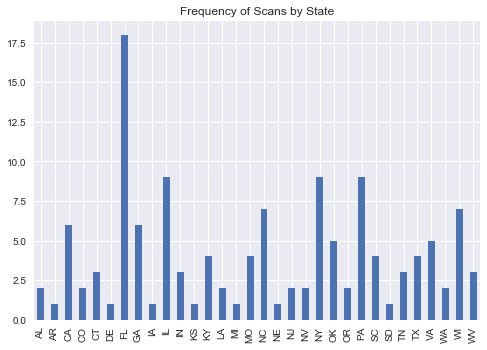

In [50]:
# Check if there is a specific state with high scans
scans_by_state = df['STATE'].value_counts().sort_index()
scans_by_state.plot(kind = 'bar', title = "Frequency of Scans by State")
plt.show()

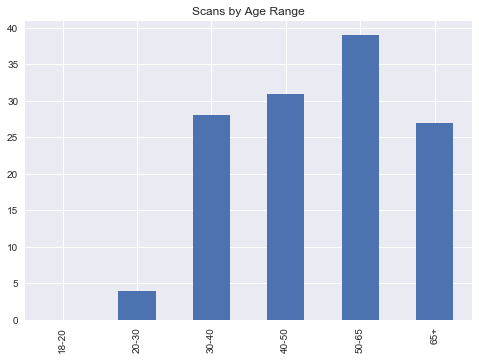

In [51]:
# let's check out the distribution of users based on their age range
scans_by_age = df['AGE_RANGE'].value_counts().sort_index()
scans_by_age.plot(kind = 'bar', title = "Scans by Age Range")
plt.show()

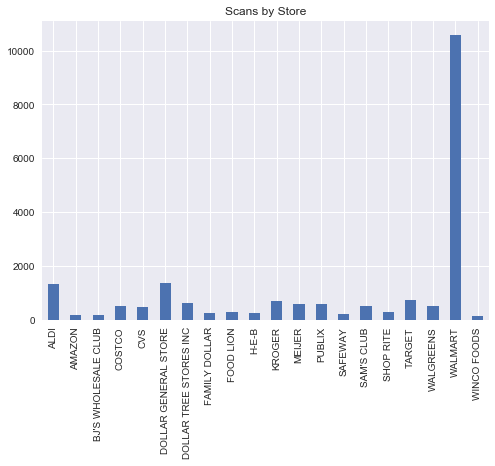

In [52]:
# Check popularity of stores
scans_by_age = df['STORE_NAME'].value_counts().head(20).sort_index()
scans_by_age.plot(kind = 'bar', title = "Scans by Store")
plt.show()

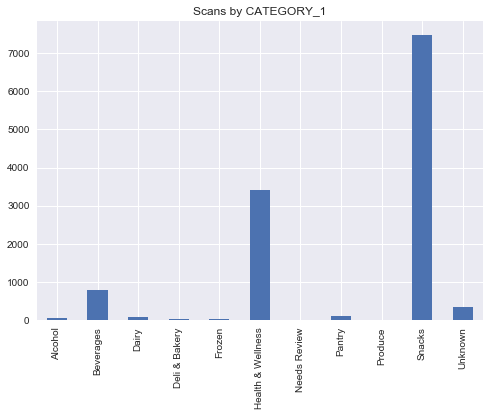

In [53]:
# Popularity of category 1
scans_by_age = df['CATEGORY_1'].value_counts().head(20).sort_index()
scans_by_age.plot(kind = 'bar', title = "Scans by CATEGORY_1")
plt.show()

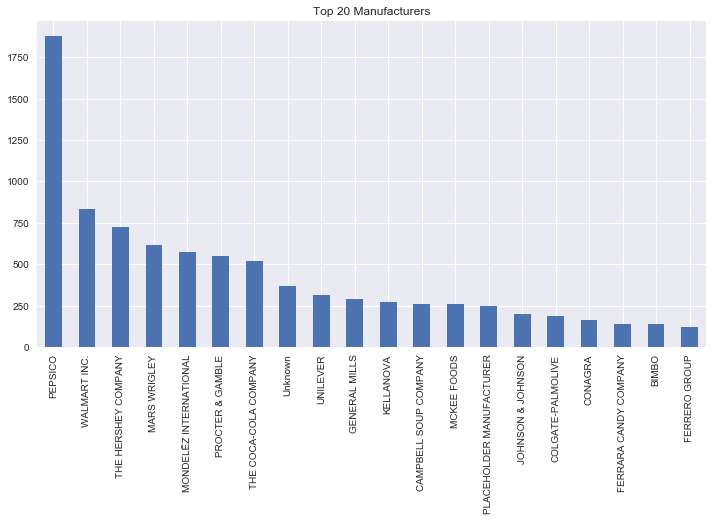

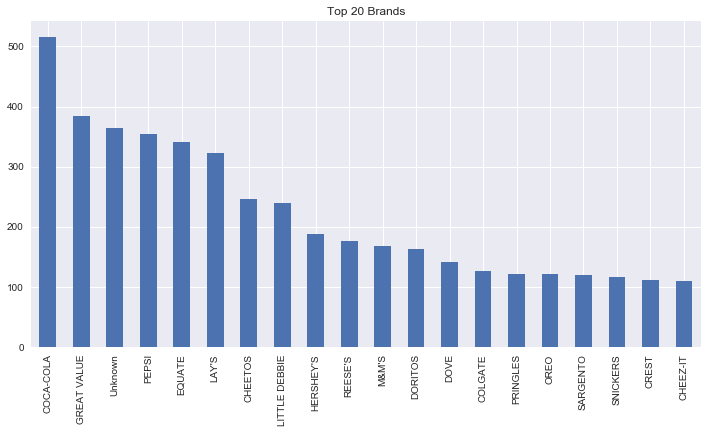

In [54]:
df['MANUFACTURER'].value_counts().head(20).plot(kind='bar', figsize=(12, 6), title='Top 20 Manufacturers')
plt.show()

df['BRAND'].value_counts().head(20).plot(kind='bar', figsize=(12, 6), title='Top 20 Brands')
plt.show()


# Findings from the graphical analysis (please note that the findings that involve user details are based only on the 130 entries )
1. It seems FL is the state where most receipts are being scanned
2. It appears that most of our users are aged 30 plus.
3. Walmart is the most popular store.
4. "Snacks", "Health & Wellness" and "Beverages" are the three most popular categories, "Snacks" being the most popular and by a  large margin.
5. Pepsico is most popular manufacturer.

## Non Graphical Analysis

In [55]:
# Manufacturer and Brand distributions
print(df['GENDER'].value_counts())
print(df['LANGUAGE'].value_counts().head(20)) #top 20 

#print(df['PURCHASE_DATE'].value_counts().head(20)) #top 20
#print(df['CREATED_DATE'].value_counts().head(20)) #top 20 
#print(df['SCAN_DATE'].value_counts().head(20)) #top 20

print(df['SCANNING_LAG'].value_counts().head(10)) #top 20 
print(df['USER_ID'].value_counts().head(10)) #top 20 


female               107
male                  22
Prefer not to say      1
Name: GENDER, dtype: int64
en        124
es-419      6
Name: LANGUAGE, dtype: int64
0     11662
1      4377
2      2186
3      1480
4      1026
5       753
6       617
7       521
8       417
10      293
Name: SCANNING_LAG, dtype: int64
64e62de5ca929250373e6cf5    11
62925c1be942f00613f7365e    10
604278958fe03212b47e657b    10
64063c8880552327897186a5     9
624dca0770c07012cd5e6c03     7
6327a07aca87b39d76e03864     7
609af341659cf474018831fb     7
63f1904938f010745b9a2b60     6
65cd1a2816cc391732119c3a     6
5e89fe8918bf1a13ef5d874c     6
Name: USER_ID, dtype: int64


# Findings from non graphical categorical analysis:
1. Females are the most loyal customer base, 82% of users are females.
2. 95% of our users have English as their language.
3. Most of the users are scanning their receipts within 7 days of purchases.
4. There are a lot of users who have scanned multiple receipts(repeat user). We should look into the behaviour of these repeat users. It would be interesting to observe repeat user behaviour by bucketing them into categories like returning within 7 days, returning within 10 days, days since last purchase

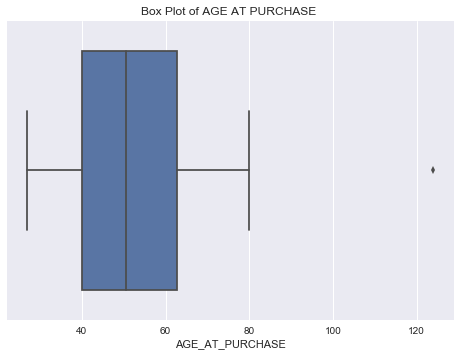

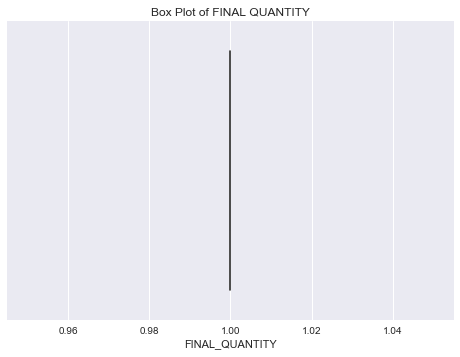

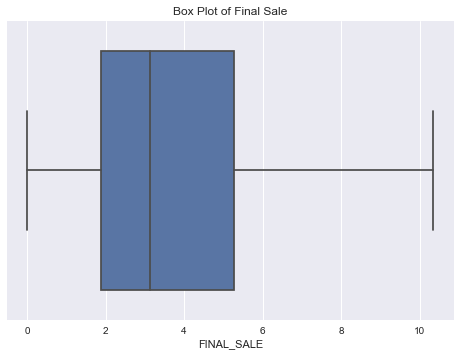

In [56]:
# Box plot for numeric variables
sns.boxplot(df['AGE_AT_PURCHASE'])
plt.title('Box Plot of AGE AT PURCHASE ')
plt.show()

sns.boxplot(df['FINAL_QUANTITY'], showfliers=False)
plt.title('Box Plot of FINAL QUANTITY')
plt.show()

sns.boxplot(df['FINAL_SALE'], showfliers=False)
plt.title('Box Plot of Final Sale')
plt.show()

In [57]:
df['SCAN_DATE']=df['SCAN_DATE'].dt.date

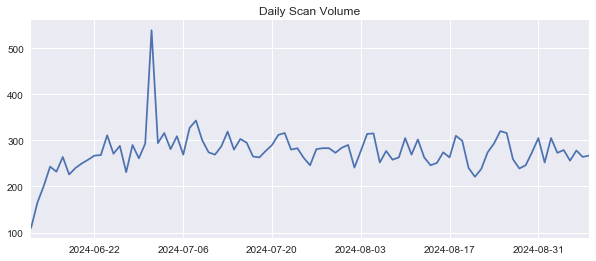

In [58]:
# Daily transaction volume by SCAN_DATE
daily_transactions = df['SCAN_DATE'].value_counts().sort_index()
daily_transactions.plot(figsize=(10, 4), title='Daily Scan Volume')
plt.show()

In [59]:
# it appears that there is an outlier in the data,let's filter it out 
daily_transactions[daily_transactions>=400]

2024-07-01    539
Name: SCAN_DATE, dtype: int64

### Unusually high number of receipts were scanned on '2024-07-01', which is strange considering that transaction volume by purchase date is fairly constant during that time, this could mean there was a promotion of some kind.


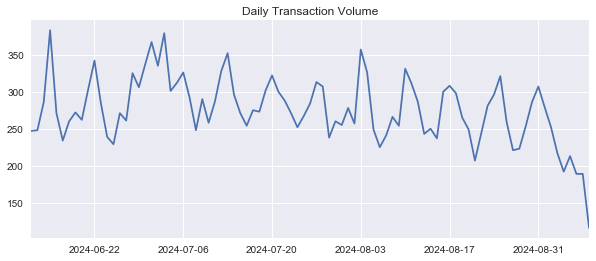

In [60]:
# Let's look at the transaction volume by purchase that on that day
daily_transactions = df['PURCHASE_DATE'].value_counts().sort_index()
daily_transactions.plot(figsize=(10, 4), title='Daily Transaction Volume')
plt.show()
#daily_transactions[daily_transactions.index == pd.to_datetime('2024-07-01')]

## Multivariate Analysis

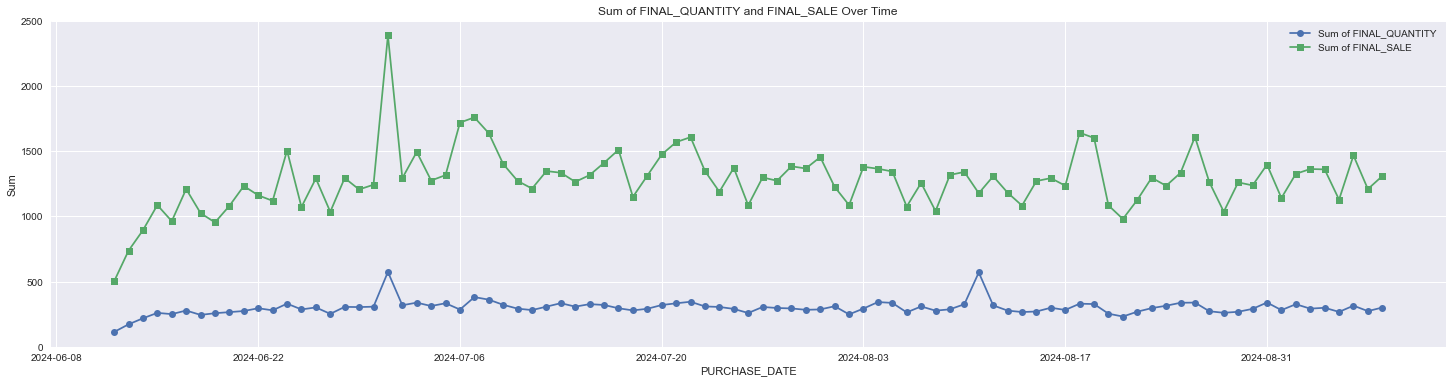

In [61]:
# Group by 'PURCHASE_DATE' and calculate the sum of 'FINAL_QUANTITY' and 'FINAL_SALE'
grouped_df = df.groupby('SCAN_DATE').agg({
    'FINAL_QUANTITY': 'sum',
    'FINAL_SALE': 'sum'
}).reset_index()

# Plot the line chart
plt.figure(figsize=(25, 6))
plt.plot(grouped_df['SCAN_DATE'], grouped_df['FINAL_QUANTITY'], label='Sum of FINAL_QUANTITY', marker='o')
plt.plot(grouped_df['SCAN_DATE'], grouped_df['FINAL_SALE'], label='Sum of FINAL_SALE', marker='s')

# Customize the plot
plt.title('Sum of FINAL_QUANTITY and FINAL_SALE Over Time')
plt.xlabel('PURCHASE_DATE')
plt.ylabel('Sum')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

In [62]:
grouped_df = df.groupby('SCAN_DATE')['FINAL_QUANTITY'].sum().reset_index()
filtered_df = grouped_df[grouped_df['FINAL_QUANTITY'] > 500]
filtered_df

,SCAN_DATE,FINAL_QUANTITY
19,2024-07-01,573.53
60,2024-08-11,569.69


Both final quantity and final sales show a significant spike on 2024-07-01. The total final quantity for 2024-08-11 is higher than usual but the total final sales for that day is not showing any spike.

### We know that Walmart is the most popular store by volume so check if that holds true for sales and quantity as well

In [63]:
total_store_sales = df.groupby(['STORE_NAME'])['FINAL_SALE'].sum().reset_index()

# Rename the aggregated column
total_store_sales.rename(columns={'FINAL_SALE': 'TOTAL_SALE'}, inplace=True)

#    # Sort by TOTAl_SALE in descending order
total_store_sales_sorted = total_store_sales.sort_values(by='TOTAL_SALE', ascending=False)
total_store_sales_sorted.head(10)

,STORE_NAME,TOTAL_SALE
904,WALMART,41125.37
174,COSTCO,6857.80
710,SAM'S CLUB,5619.86
187,CVS,4946.93
823,TARGET,4624.60
211,DOLLAR GENERAL STORE,4454.09
903,WALGREENS,4418.36
20,ALDI,3601.58
451,KROGER,2887.60
533,MEIJER,2766.04


In [64]:
total_store_sales = df.groupby(['STORE_NAME'])['FINAL_QUANTITY'].sum().reset_index()

# Rename the aggregated column
total_store_sales.rename(columns={'FINAL_QUANTITY': 'TOTAL_QUANTITY'}, inplace=True)

#  Sort by TOTAL_QUALITY in descending order
total_store_sales_sorted = total_store_sales.sort_values(by='TOTAL_QUANTITY', ascending=False)
total_store_sales_sorted.head(10)

,STORE_NAME,TOTAL_QUANTITY
904,WALMART,11054.08
20,ALDI,1486.10
211,DOLLAR GENERAL STORE,1485.00
823,TARGET,821.00
533,MEIJER,745.40
451,KROGER,698.38
214,DOLLAR TREE STORES INC,613.00
903,WALGREENS,606.00
652,PUBLIX,592.98
710,SAM'S CLUB,522.00


Walmart is the most popular store in all regards be it sales value, sales wuantity or sales volume. 
However if we look at sale value costco is the store with highest sale but it doesn't even rank 10th in total quantities

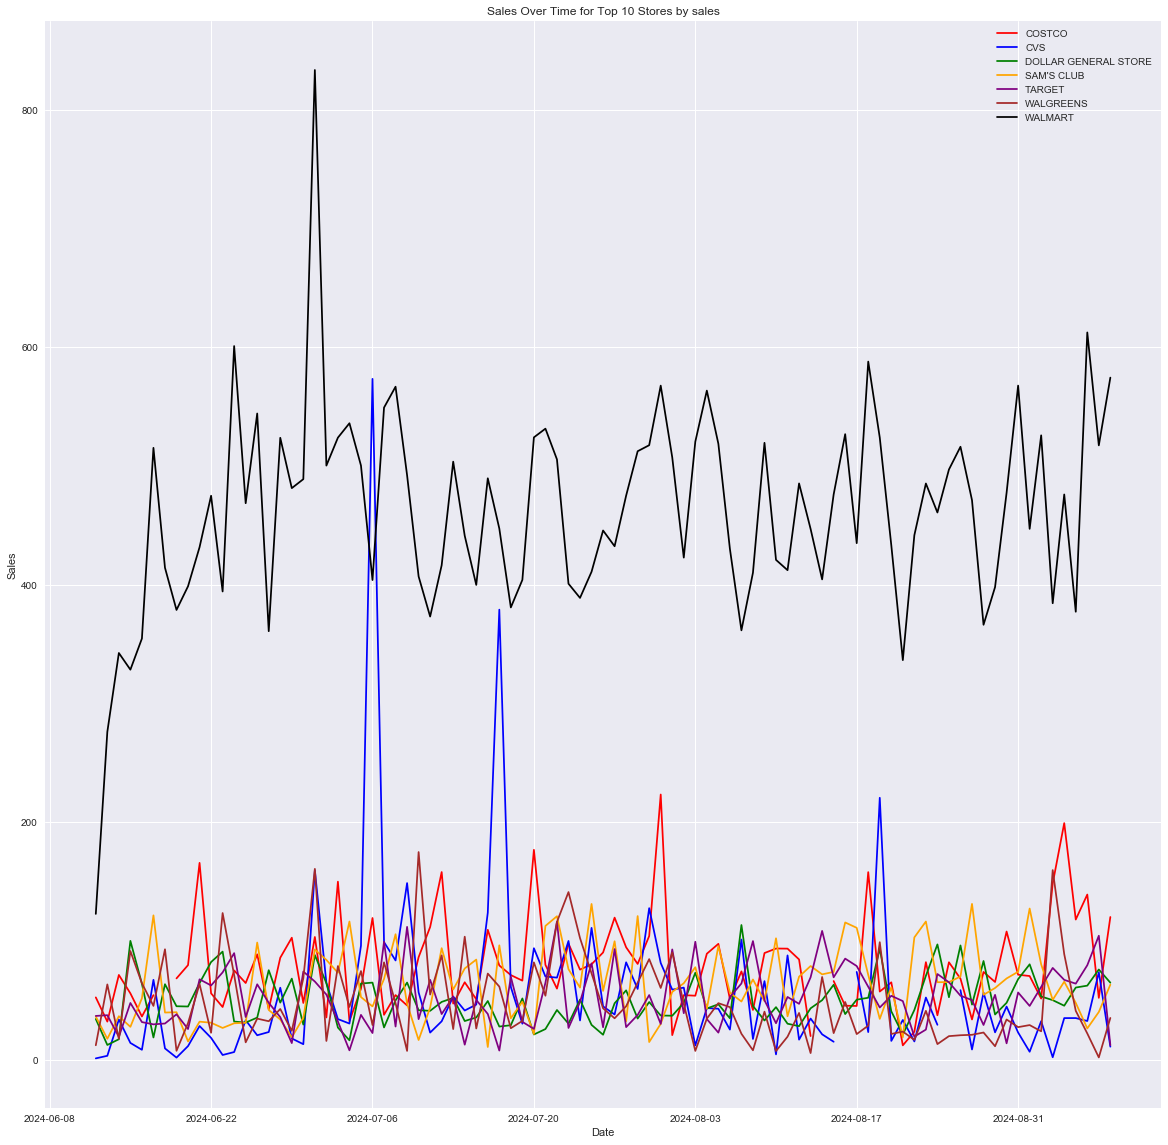

In [65]:
# Looking for patterns in the sales and volume by store over time

# Group by store and date, then sum the sales
grouped_df = df.groupby(['STORE_NAME', 'SCAN_DATE'], as_index=False)['FINAL_SALE'].sum()

# Calculate total sales for each store
total_sales = grouped_df.groupby('STORE_NAME')['FINAL_SALE'].sum().reset_index()

# Get the top 10 stores by total sales
top_stores = total_sales.nlargest(7, 'FINAL_SALE')['STORE_NAME']

# Filter the grouped DataFrame to include only the top 10 stores
filtered_df = grouped_df[grouped_df['STORE_NAME'].isin(top_stores)]
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'black', 'gray', 'olive', 'cyan']
# Pivot the data to have stores as columns and dates as rows
pivot_df = filtered_df.pivot(index='SCAN_DATE', columns='STORE_NAME', values='FINAL_SALE')

# Plot the data
plt.figure(figsize=(20,20))
for store, color in zip(pivot_df.columns, colors):
    plt.plot(pivot_df.index, pivot_df[store], label=store,color=color)

plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Over Time for Top 10 Stores by sales')
plt.legend()
plt.show()

It appears, the spike on 2024-07-01 was caused by scanning receipts from Walmart.

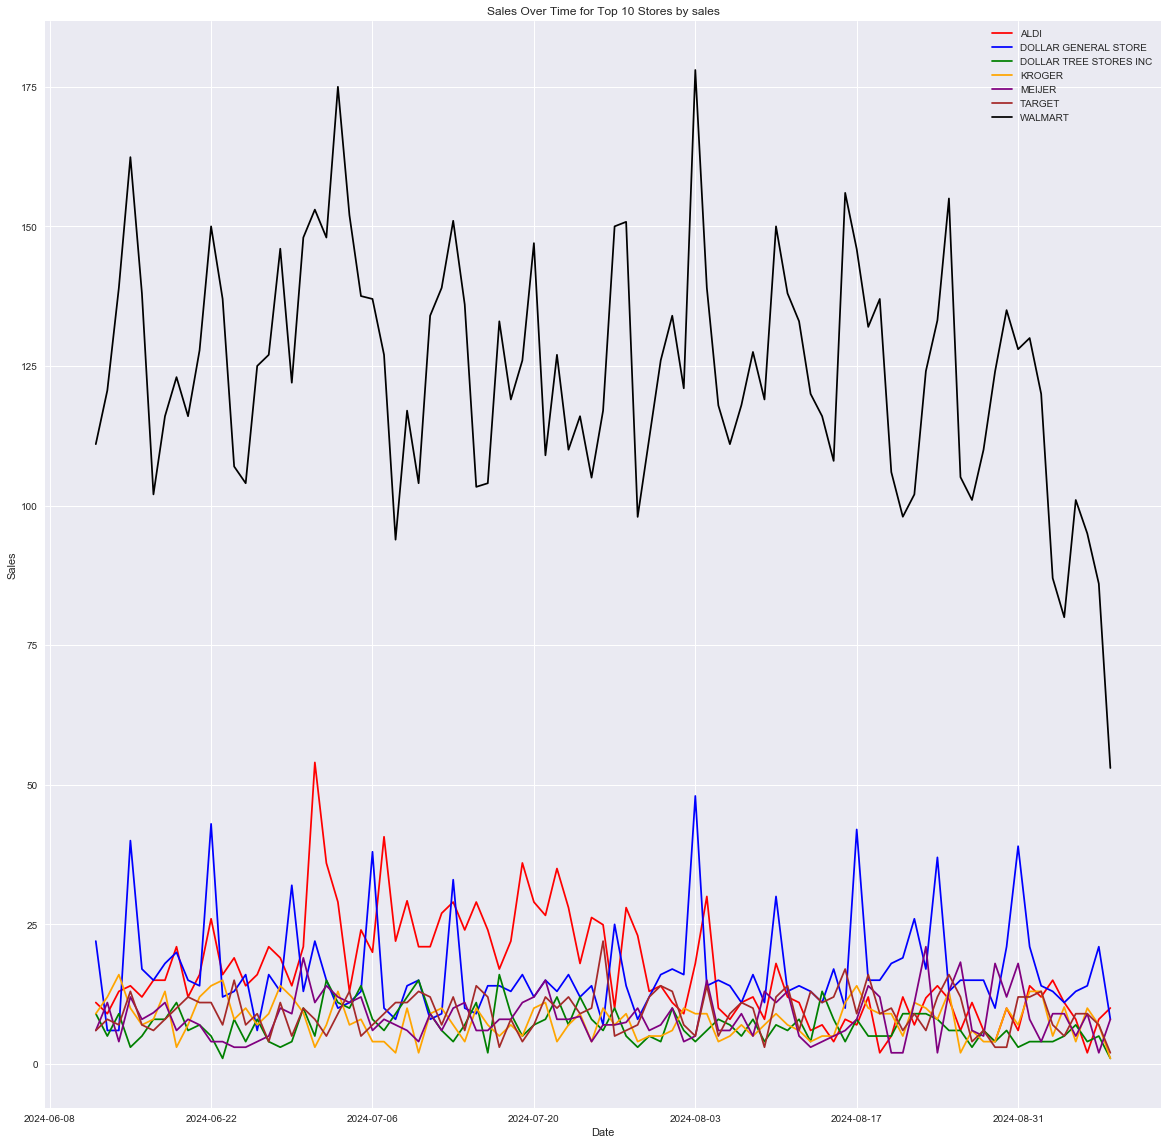

In [66]:
# Group by store and date, then sum the sales
grouped_df = df.groupby(['STORE_NAME', 'PURCHASE_DATE'], as_index=False)['FINAL_QUANTITY'].sum()

# Calculate total sales for each store
total_sales = grouped_df.groupby('STORE_NAME')['FINAL_QUANTITY'].sum().reset_index()

# Get the top 10 stores by total sales
top_stores = total_sales.nlargest(7, 'FINAL_QUANTITY')['STORE_NAME']

# Filter the grouped DataFrame to include only the top 10 stores
filtered_df = grouped_df[grouped_df['STORE_NAME'].isin(top_stores)]
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'black', 'gray', 'olive', 'cyan']
# Pivot the data to have stores as columns and dates as rows
pivot_df = filtered_df.pivot(index='PURCHASE_DATE', columns='STORE_NAME', values='FINAL_QUANTITY')

# Plot the data
plt.figure(figsize=(20,20))
for store, color in zip(pivot_df.columns, colors):
    plt.plot(pivot_df.index, pivot_df[store], label=store,color=color)

plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Over Time for Top 10 Stores by sales')
plt.legend()
plt.show()

We have noticed that our 68% of our users are females but 82% of our users that could be joined to the transaction table are females. So trying to check if there is any pattern/insight there:

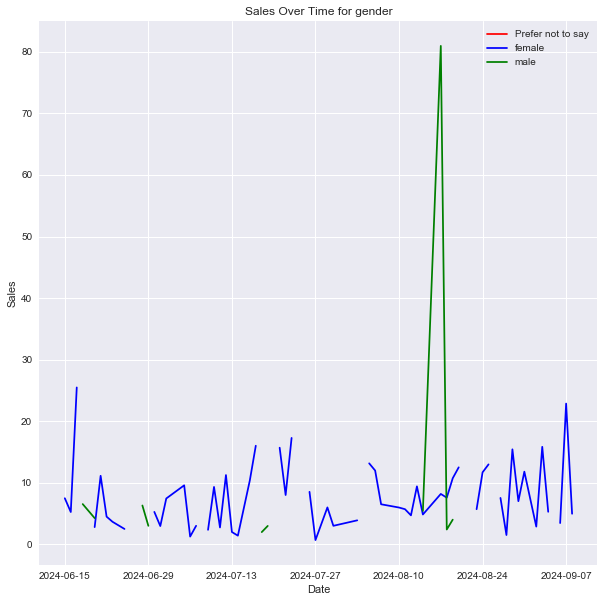

In [67]:
# Group by gender and date, then sum the sales
grouped_df = df.groupby(['GENDER', 'SCAN_DATE'], as_index=False)['FINAL_SALE'].sum()

# Calculate total sales for each gender
total_sales = grouped_df.groupby('GENDER')['FINAL_SALE'].sum().reset_index()

# Get the top gender by total sales
top_stores = total_sales.nlargest(7, 'FINAL_SALE')['GENDER']

# Filter the grouped DataFrame 
filtered_df = grouped_df[grouped_df['GENDER'].isin(top_stores)]
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'black', 'gray', 'olive', 'cyan']
# Pivot the data to have gender as columns and dates as rows
pivot_df = filtered_df.pivot(index='SCAN_DATE', columns='GENDER', values='FINAL_SALE')

# Plot the data
plt.figure(figsize=(10,10))
for store, color in zip(pivot_df.columns, colors):
    plt.plot(pivot_df.index, pivot_df[store], label=store,color=color)

plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Over Time for gender')
plt.legend()
plt.show()

Since there are only 130 users whose user details are available in our merged data, unable to find any meaningful insight

Even though we have data for only 130 users still trying to check if the distribution of states is giving any insights

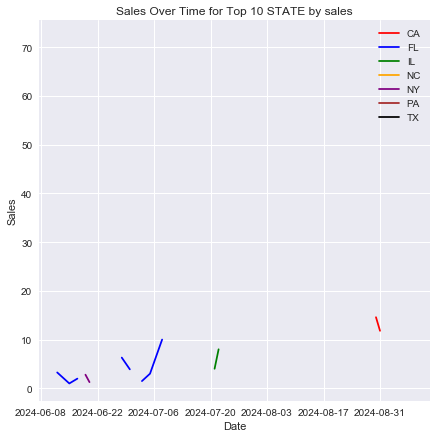

In [68]:
# Group by STATE and date, then sum the sales
grouped_df = df.groupby(['STATE', 'PURCHASE_DATE'], as_index=False)['FINAL_SALE'].sum()

# Calculate total sales for each STATE
total_sales = grouped_df.groupby('STATE')['FINAL_SALE'].sum().reset_index()

# Get the top 10 stores by total sales
top_stores = total_sales.nlargest(7, 'FINAL_SALE')['STATE']

# Filter the grouped DataFrame to include only the top 10 STATE
filtered_df = grouped_df[grouped_df['STATE'].isin(top_stores)]
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'black', 'gray', 'olive', 'cyan']
# Pivot the data to have stores as columns and dates as rows
pivot_df = filtered_df.pivot(index='PURCHASE_DATE', columns='STATE', values='FINAL_SALE')

# Plot the data
plt.figure(figsize=(7,7))
for store, color in zip(pivot_df.columns, colors):
    plt.plot(pivot_df.index, pivot_df[store], label=store,color=color)

plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Over Time for Top 10 STATE by sales')
plt.legend()
plt.show()

 ##  Let's try to look at repeat user behaviour over time without focusing on user details. 

In [69]:

user_transaction_counts = df['USER_ID'].value_counts()

user_transaction_counts.head(10)

64e62de5ca929250373e6cf5    11
62925c1be942f00613f7365e    10
604278958fe03212b47e657b    10
64063c8880552327897186a5     9
624dca0770c07012cd5e6c03     7
6327a07aca87b39d76e03864     7
609af341659cf474018831fb     7
63f1904938f010745b9a2b60     6
65cd1a2816cc391732119c3a     6
5e89fe8918bf1a13ef5d874c     6
Name: USER_ID, dtype: int64

In [70]:
df[df['USER_ID']=='64e62de5ca929250373e6cf5']

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE,SCANNING_LAG,CATEGORY_1,...,CATEGORY_4,MANUFACTURER,BRAND,CREATED_DATE,BIRTH_DATE,STATE,LANGUAGE,GENDER,AGE_AT_PURCHASE,AGE_RANGE
2910,1e45c4de-9773-48f0-91b1-8f368871abaa,2024-09-05,2024-09-06,ALDI,64e62de5ca929250373e6cf5,NaN,1.0,3.69,1,NaN,...,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN
4123,2acb0991-022f-4c80-b78d-d1667b2a2944,2024-09-04,2024-09-04,ALDI,64e62de5ca929250373e6cf5,NaN,1.0,3.69,0,NaN,...,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN
11564,79ab22a5-d32d-469b-b185-b5dbdc807fd1,2024-07-22,2024-07-22,ALDI,64e62de5ca929250373e6cf5,NaN,1.0,1.39,0,NaN,...,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN
14550,974b419f-dc24-4cc7-91cf-4f812cb1a396,2024-09-03,2024-09-03,ALDI,64e62de5ca929250373e6cf5,NaN,1.0,1.29,0,NaN,...,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN
14551,974b419f-dc24-4cc7-91cf-4f812cb1a396,2024-09-03,2024-09-03,ALDI,64e62de5ca929250373e6cf5,NaN,1.0,4.00,0,NaN,...,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN
14731,992b4297-2a27-4538-ab54-750f36d69ac1,2024-09-05,2024-09-06,ALDI,64e62de5ca929250373e6cf5,3.111118e+11,1.0,5.98,1,NaN,...,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN
16478,ab7fd5dc-a2cf-4650-ae94-7425dff66b5f,2024-06-20,2024-06-24,ALDI,64e62de5ca929250373e6cf5,NaN,1.0,2.99,4,NaN,...,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN
16834,af6135ba-8073-4a8f-9f52-bd6e896c49b7,2024-07-31,2024-07-31,ALDI,64e62de5ca929250373e6cf5,NaN,1.0,0.99,0,NaN,...,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN
19820,cf19e7b7-db2b-4d53-930f-6c8a6b48cb2d,2024-07-11,2024-07-11,ALDI,64e62de5ca929250373e6cf5,NaN,1.0,1.59,0,NaN,...,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN
21522,e110c5c0-cd51-438c-a5c6-b3da426da3b9,2024-07-22,2024-07-22,ALDI,64e62de5ca929250373e6cf5,NaN,1.0,2.85,0,NaN,...,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN


In [71]:
user_receipt_counts = df.groupby('USER_ID')['RECEIPT_ID'].nunique()
user_counts_frequency = user_receipt_counts.value_counts().sort_index().reset_index()
user_counts_frequency.columns = ['Number of Receipts', 'Number of Users']
user_counts_frequency. head(15)

,Number of Receipts,Number of Users
0,1,12643
1,2,3585
2,3,956
3,4,255
4,5,58
5,6,14
6,7,4
7,9,1
8,10,2


In [72]:
total_spending_per_user = df.groupby('USER_ID')['FINAL_SALE'].sum().reset_index()
#avg_transaction_value_per_user =df.groupby('USER_ID')['FINAL_SALE'].mean()

#print("Total Spending per User:\n", total_spending_per_user)
#print("\nAverage Transaction Value per User:\n", avg_transaction_value_per_user)

In [73]:
total_spending_per_user.sort_values(by = [ 'FINAL_SALE','USER_ID'], ascending=[False,False])

,USER_ID,FINAL_SALE
10295,630789e1101ae272a4852287,462.82
14684,650874eafe41d365c2ee11d2,267.29
12078,63af23db9f3fc9c7546fdbec,238.17
13505,645add3bffe0d7e043ef1b63,227.93
14950,6535138fdda97e6b1342ea7f,146.65
12203,63ba250039c79dcbdd4fbc6c,124.17
9267,62a6592437737fe70d02d538,104.49
11454,637257e75fdbb03aa198a310,104.14
10419,63135413b2906b770ea7c637,102.70
5418,60a1c703ab940907ee5a6e3c,94.76


In [74]:
# check for entries where barcode is missing, is it for specific purchase or scan dates

missing_barcode= df[df['BARCODE'].isnull()]

In [75]:
#missing_barcode['SCAN_DATE'].value_counts()
#missing_barcode['PURCHASE_DATE'].value_counts()
#missing_barcode['USER_ID'].value_counts()
#missing_barcode['STORE_NAME'].value_counts()


We are unable to find any patterns in the data with missing barcode